**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [511]:
df = pd.read_csv('HR_DATA.csv', sep=';')
df.head()

,RequestID,EmpID,EmpName,Dept,Request_Date,Completion_Date,Request_Detail,PIC
0,REQ0001,103,Charlie Davis,HR,01/01/2024,09/01/2024,Payroll Issue,Sarah Supervisor
1,REQ0002,103,Charlie Davis,HR,01/01/2024,02/01/2024,Access Approval,John Manager
2,REQ0003,105,Eve Wilson,HR,01/01/2024,03/01/2024,Access Approval,John Manager
3,REQ0004,104,David Brown,HR,02/01/2024,10/01/2024,Payroll Issue,Sarah Supervisor
4,REQ0005,102,Bob Smith,HR,02/01/2024,04/01/2024,Benefit Claim,John Manager


In [512]:
df.dtypes

RequestID          object
EmpID               int64
EmpName            object
Dept               object
Request_Date       object
Completion_Date    object
Request_Detail     object
PIC                object
dtype: object

In [513]:
df.isna().sum()

RequestID           0
EmpID               0
EmpName             0
Dept                0
Request_Date        9
Completion_Date    93
Request_Detail      6
PIC                 5
dtype: int64

In [514]:
df['Request_Detail'] = df['Request_Detail'].fillna(df['Request_Detail'].mode()[0])
df['PIC'] = df['PIC'].fillna(df['PIC'].mode()[0])

df.isna().sum()

RequestID           0
EmpID               0
EmpName             0
Dept                0
Request_Date        9
Completion_Date    93
Request_Detail      0
PIC                 0
dtype: int64

In [515]:
df['Completion_Date'] = pd.to_datetime(df['Completion_Date'], format='%d/%m/%Y')
df['Request_Date'] = pd.to_datetime(df['Request_Date'], format='%d/%m/%Y')

df.dtypes

RequestID                  object
EmpID                       int64
EmpName                    object
Dept                       object
Request_Date       datetime64[ns]
Completion_Date    datetime64[ns]
Request_Detail             object
PIC                        object
dtype: object

In [516]:
inflow = df['Request_Date'].notna().sum()
outflow = df['Completion_Date'].notna().sum()
backlog = df[df['Request_Date'].notna() & df['Completion_Date'].isna()].shape[0]
open_req = df[df['Request_Date'].isna()].shape[0]

print(inflow)
print(outflow)
print(backlog)
print(open_req)

991
907
93
9


In [517]:
df['Processing Days'] = df.apply(
    lambda row: np.busday_count(row['Request_Date'].date(), row['Completion_Date'].date())
    if pd.notna(row['Request_Date']) and pd.notna(row['Completion_Date'])
    else np.nan, axis=1
)

In [518]:
df['SLA Compliance'] = df['Processing Days'].apply(lambda x: 'Pass' if x <= 3 else 'Miss' if pd.notnull(x) else 'Pending')

In [519]:
df.head(50)

,RequestID,EmpID,EmpName,Dept,Request_Date,Completion_Date,Request_Detail,PIC,Processing Days,SLA Compliance
0,REQ0001,103,Charlie Davis,HR,2024-01-01,2024-01-09,Payroll Issue,Sarah Supervisor,6.0,Miss
1,REQ0002,103,Charlie Davis,HR,2024-01-01,2024-01-02,Access Approval,John Manager,1.0,Pass
2,REQ0003,105,Eve Wilson,HR,2024-01-01,2024-01-03,Access Approval,John Manager,2.0,Pass
3,REQ0004,104,David Brown,HR,2024-01-02,2024-01-10,Payroll Issue,Sarah Supervisor,6.0,Miss
4,REQ0005,102,Bob Smith,HR,2024-01-02,2024-01-04,Benefit Claim,John Manager,2.0,Pass
5,REQ0006,105,Eve Wilson,HR,2024-01-03,NaT,Benefit Claim,John Manager,NaN,Pending
6,REQ0007,101,Alice Johnson,HR,2024-01-03,2024-01-10,Payroll Issue,Sarah Supervisor,5.0,Miss
7,REQ0008,103,Charlie Davis,HR,2024-01-03,2024-01-10,Payroll Issue,John Manager,5.0,Miss
8,REQ0009,105,Eve Wilson,HR,2024-01-03,2024-01-05,Benefit Claim,John Manager,2.0,Pass
9,REQ0010,102,Bob Smith,HR,2024-01-03,2024-01-04,ID Card Replacement,John Manager,1.0,Pass


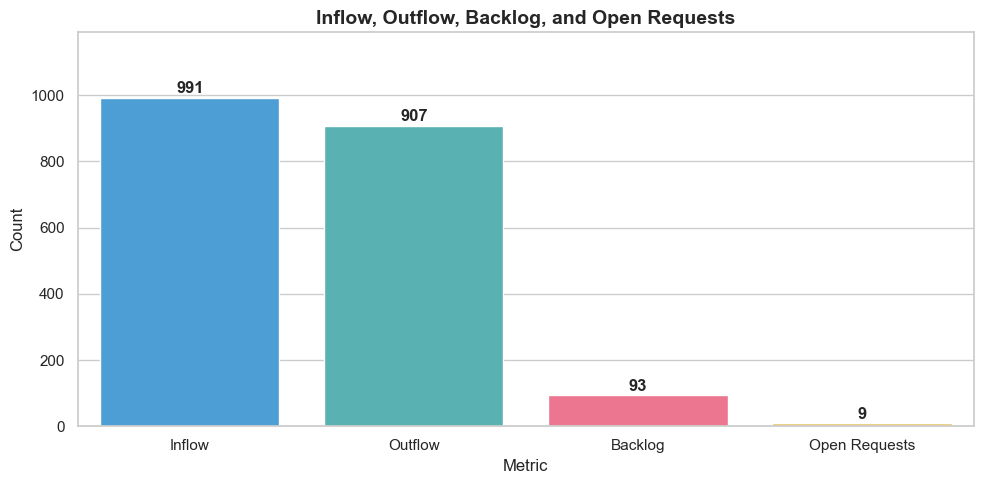

In [520]:

result = pd.DataFrame({
    "Metric": ["Inflow", "Outflow", "Backlog", "Open Requests"],
    "Count": [inflow, outflow, backlog, open_req]
})


palette = ['#36A2EB', '#4BC0C0', '#FF6384', '#FFCE56']


plt.figure(figsize=(10, 5))


bars = sns.barplot(
    data=result, 
    x='Metric', 
    y='Count', 
    hue='Metric', 
    palette=palette,
    legend=False
)


for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 5, 
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Inflow, Outflow, Backlog, and Open Requests', fontsize=14, weight='bold')
plt.ylim(0, max(result['Count']) * 1.2)
plt.tight_layout()
plt.show()


In [521]:
df['Request_Month'] = df['Request_Date'].dt.to_period('M')
df['Completion_Month'] = df['Completion_Date'].dt.to_period('M')

inflow_monthly = df.groupby('Request_Month').size().rename('Inflow')
outflow_monthly = df.groupby('Completion_Month').size().rename('Outflow')

monthly = pd.concat([inflow_monthly, outflow_monthly], axis=1).fillna(0).astype(int)
monthly.index = monthly.index.to_timestamp()

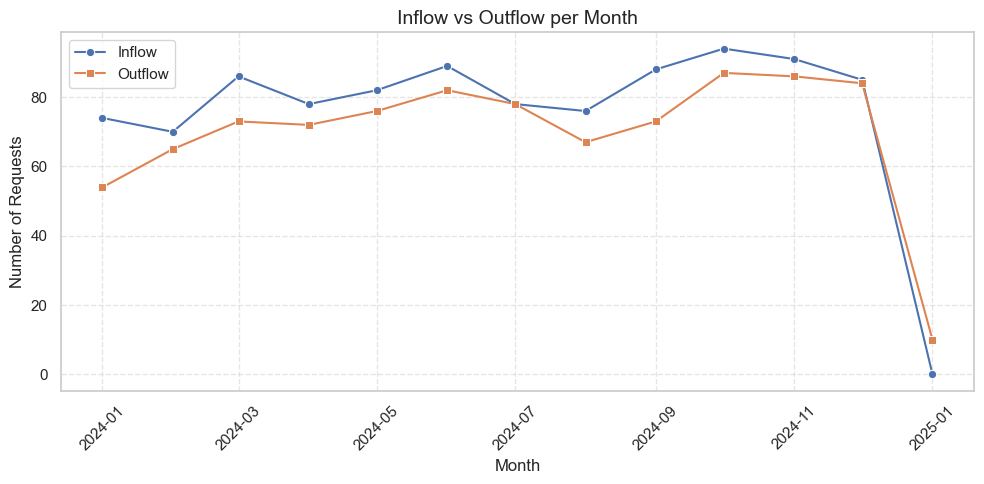

In [522]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x=monthly.index, y='Inflow', label='Inflow', marker='o')
sns.lineplot(data=monthly, x=monthly.index, y='Outflow', label='Outflow', marker='s')

plt.title('Inflow vs Outflow per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Requests')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [523]:
df['SLA Compliance Month'] = df['Completion_Date'].dt.to_period('M')

sla_monthly = df.groupby(['SLA Compliance Month', 'SLA Compliance']).size().unstack(fill_value=0)
sla_monthly.index = sla_monthly.index.to_timestamp()

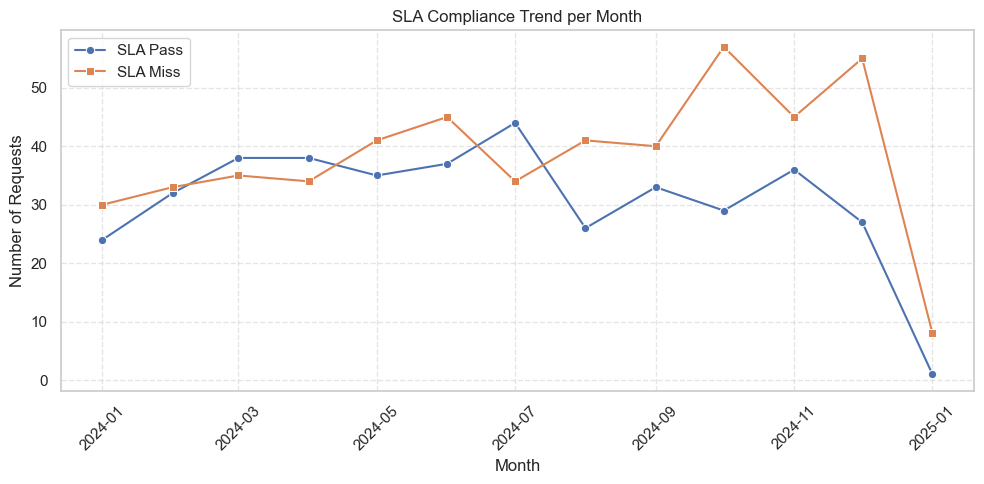

In [524]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sla_monthly['Pass'], label='SLA Pass', marker='o')
sns.lineplot(data=sla_monthly['Miss'], label='SLA Miss', marker='s')

plt.title('SLA Compliance Trend per Month')
plt.xlabel('Month')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [525]:
base_date = pd.to_datetime("1970-01-01")
df_backlog = df[df['Request_Date'].notna() & df['Completion_Date'].isna()]

In [ ]:
complete_data = df[df['Request_Date'].notna() & df['Completion_Date'].notna()].copy()
complete_data['Request_Days'] = (complete_data['Request_Date'] - base_date).dt.days
complete_data['Completion_Days'] = (complete_data['Completion_Date'] - base_date).dt.days
complete_data['Processing_Days'] = complete_data['Completion_Days'] - complete_data['Request_Days']

X_comp = pd.get_dummies(complete_data[['Request_Detail', 'PIC']], drop_first=True)
y_comp = complete_data['Processing_Days']

X_train, X_test, y_train, y_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=42)

#Linear Regression
model_completion = LinearRegression()
model_completion.fit(X_train, y_train)
#Random Forest 
model_completion = RandomForestRegressor(n_estimators=100, random_state=42)
model_completion.fit(X_train, y_train)
#Decision Tree
model_completion = DecisionTreeRegressor(random_state=42)
model_completion.fit(X_train, y_train)
#K-Nearest Neighbor
model_completion = KNeighborsRegressor(n_neighbors=5)
model_completion.fit(X_train, y_train)
#Support Vector Regressor
model_completion = SVR()
model_completion.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [528]:

X_backlog = pd.get_dummies(df_backlog[['Request_Detail', 'PIC']], drop_first=True)
X_backlog = X_backlog.reindex(columns=X_comp.columns, fill_value=0)
predicted_days = model_completion.predict(X_backlog).round().astype(int)
df_backlog = df[df['Completion_Date'].isna() & df['Request_Date'].notna()].copy()
df_backlog.loc[:, 'Predicted_Completion_Date'] = df_backlog['Request_Date'] + pd.to_timedelta(predicted_days, unit='D')

In [ ]:

df_open = df[df['Request_Date'].isna() & df['Completion_Date'].notna()].copy()
df_pred = df[df['Request_Date'].notna() & df['Completion_Date'].notna()].copy()

df_pred['Completion_Days'] = (df_pred['Completion_Date'] - base_date).dt.days
y_pred = (df_pred['Request_Date'] - base_date).dt.days
X_pred = pd.get_dummies(df_pred[['Completion_Days', 'Request_Detail', 'PIC']], drop_first=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)

# Random Forest
model_request = RandomForestRegressor(n_estimators=100, random_state=42)
model_request.fit(X_train2, y_train2)
#Linear Regression
model_request = LinearRegression()
model_request.fit(X_train2, y_train2)
#Decision Tree
model_request = DecisionTreeRegressor(random_state=42)
model_request.fit(X_train2, y_train2)
#K-Nearest Neighbor
model_request = KNeighborsRegressor(n_neighbors=5)
model_request.fit(X_train2, y_train2)
#Support Vector Regressor
model_request = SVR()
model_request.fit(X_train2, y_train2)

df_open['Completion_Days'] = (df_open['Completion_Date'] - base_date).dt.days
X_open = pd.get_dummies(df_open[['Completion_Days', 'Request_Detail', 'PIC']], drop_first=True)
X_open = X_open.reindex(columns=X_pred.columns, fill_value=0)
predicted_start_days = model_request.predict(X_open).round().astype(int)


In [ ]:
y_predC = model_completion.predict(X_test)
y_predR = model_request.predict(X_test2)

maeC = mean_absolute_error(y_test, y_predC)
maeR = mean_absolute_error(y_test2,y_predR)

print(f'MAE : {maeC} days')
print(f'MAE : {maeR} days')

In [530]:

min_date = pd.to_datetime('2020-01-01').toordinal()
max_date = pd.to_datetime('2025-12-31').toordinal()
predicted_start_days = np.clip(predicted_start_days, min_date - base_date.toordinal(), max_date - base_date.toordinal())

df_open['Predicted_Request_Date'] = base_date + pd.to_timedelta(predicted_start_days, unit='D')

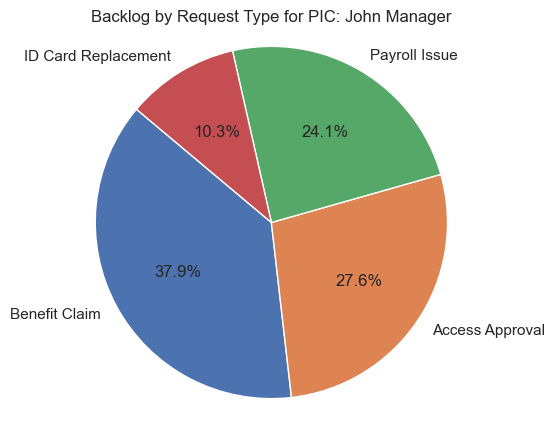

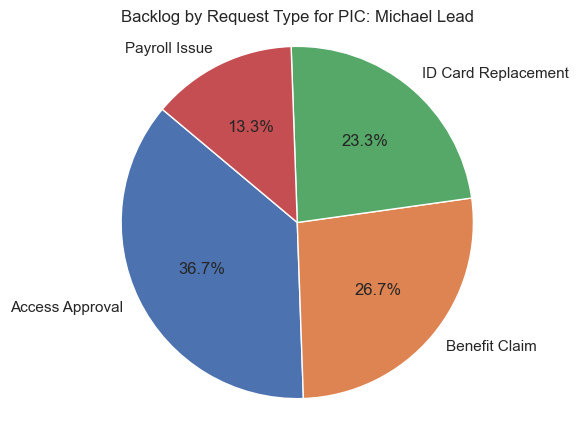

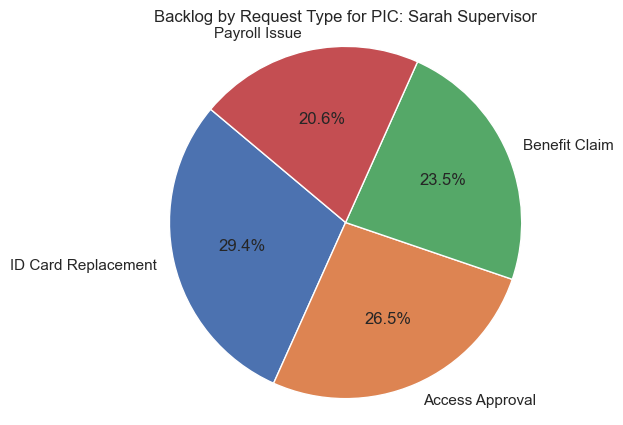

In [531]:


for pic in df_backlog['PIC'].dropna().unique():
    df_pic = df_backlog[df_backlog['PIC'] == pic]
    if df_pic.empty: continue
    counts = df_pic['Request_Detail'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Backlog by Request Type for PIC: {pic}')
    plt.axis('equal')
    plt.show()


In [532]:

pred_completion_table = df_backlog[['Request_Date', 'Request_Detail', 'PIC', 'Predicted_Completion_Date']].head(10)


pred_request_table = df_open[['Completion_Date', 'Request_Detail', 'PIC', 'Predicted_Request_Date']].head(10)

display(pred_completion_table)
display(pred_request_table)

,Request_Date,Request_Detail,PIC,Predicted_Completion_Date
5,2024-01-03,Benefit Claim,John Manager,2024-01-08
23,2024-01-14,Access Approval,Michael Lead,2024-01-20
38,2024-01-18,ID Card Replacement,John Manager,2024-01-24
57,2024-01-25,Access Approval,Michael Lead,2024-01-31
63,2024-01-27,Access Approval,John Manager,2024-02-01
66,2024-01-29,Benefit Claim,John Manager,2024-02-03
67,2024-01-29,Benefit Claim,John Manager,2024-02-03
73,2024-01-31,Benefit Claim,Sarah Supervisor,2024-02-05
78,2024-02-02,Payroll Issue,Sarah Supervisor,2024-02-08
92,2024-02-08,Payroll Issue,Michael Lead,2024-02-13


,Completion_Date,Request_Detail,PIC,Predicted_Request_Date
785,2024-10-23,Benefit Claim,Michael Lead,2024-10-20
802,2024-11-03,Benefit Claim,Michael Lead,2024-10-29
821,2024-11-09,Payroll Issue,Michael Lead,2024-11-06
846,2024-11-13,ID Card Replacement,Sarah Supervisor,2024-11-04
869,2024-11-26,Payroll Issue,Sarah Supervisor,2024-11-20
896,2024-11-26,ID Card Replacement,Sarah Supervisor,2024-11-21
920,2024-12-05,Benefit Claim,John Manager,2024-11-27
953,2024-12-16,Access Approval,John Manager,2024-12-09
995,2025-01-09,Benefit Claim,Sarah Supervisor,2024-12-29


In [533]:
df.isna().sum()

RequestID                 0
EmpID                     0
EmpName                   0
Dept                      0
Request_Date              9
Completion_Date          93
Request_Detail            0
PIC                       0
Processing Days         102
SLA Compliance            0
Request_Month             9
Completion_Month         93
SLA Compliance Month     93
dtype: int64

In [534]:
df.loc[df['Request_Date'].isna() & df['Completion_Date'].notna(), 'Request_Date'] = df_open['Predicted_Request_Date']
df.loc[df['Request_Date'].notna() & df['Completion_Date'].isna(), 'Completion_Date'] = df_backlog['Predicted_Completion_Date']